In [1]:
%matplotlib inline
import os
import struct
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import transforms, models
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import pickle
import torch.nn as nn
import time

In [2]:
# Loading the saved features
with open("test_image.pkl", "rb") as f:
    testImages = pickle.load(f)

with open("train_image.pkl", "rb") as f:
    trainImages = pickle.load(f)
with open("train_label.pkl", "rb") as f:
    trainLabels = pickle.load(f)

In [3]:
testLabels = [None] * 2000
for i in range(8000):
  if(trainLabels[i]==6):
    trainLabels[i] = 1
for i in range(500):
  testLabels[i] = 0
  testLabels[i+500] = 2
  testLabels[i+1000] = 3
  testLabels[i+1500] = 1

In [4]:
trainImages = np.asarray(trainImages)
trainImages = trainImages.reshape(-1,1,28,28)
testImages = np.asarray(testImages)
testImages = testImages.reshape(-1,1,28,28)

trainImages = (torch.from_numpy(trainImages)).float()
trainLabels = torch.from_numpy(np.asarray(trainLabels))
testImages = (torch.from_numpy(np.asarray(testImages))).float()
testLabels = torch.from_numpy(np.asarray(testLabels))

In [5]:
# plt.imshow(trainImages[0].reshape((28,28)))
# print(trainLabels[0])

In [6]:
BatchSize = 100

trainset = torch.utils.data.TensorDataset(trainImages, trainLabels)
testset = torch.utils.data.TensorDataset(testImages, testLabels)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize, shuffle=True, num_workers=4)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize, shuffle=False, num_workers=4)

In [7]:
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))

No. of samples in train set: 8000
No. of samples in test set: 2000


In [8]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)


In [9]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)


In [10]:
# Check availability of GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    print('GPU is available!')   
    net = net.cuda()

In [11]:
criterion = nn.NLLLoss() # Negative Log-likelihood
optimizer = optim.Adam(net.parameters(), lr=1e-5) # Adam

/home/akansha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Iteration: 1 /100  ;  Training Loss: 0.016564 ; Testing Acc: 34.950 ; Time consumed: 0m 2s 
Iteration: 2 /100  ;  Training Loss: 0.012526 ; Testing Acc: 50.550 ; Time consumed: 0m 2s 
Iteration: 3 /100  ;  Training Loss: 0.010548 ; Testing Acc: 59.200 ; Time consumed: 0m 2s 
Iteration: 4 /100  ;  Training Loss: 0.009227 ; Testing Acc: 63.400 ; Time consumed: 0m 2s 
Iteration: 5 /100  ;  Training Loss: 0.008364 ; Testing Acc: 66.450 ; Time consumed: 0m 2s 
Iteration: 6 /100  ;  Training Loss: 0.007839 ; Testing Acc: 66.950 ; Time consumed: 0m 1s 
Iteration: 7 /100  ;  Training Loss: 0.007481 ; Testing Acc: 68.500 ; Time consumed: 0m 2s 
Iteration: 8 /100  ;  Training Loss: 0.007233 ; Testing Acc: 68.700 ; Time consumed: 0m 2s 
Iteration: 9 /100  ;  Training Loss: 0.007039 ; Testing Acc: 68.850 ; Time consumed: 0m 2s 
Iteration: 10 /100  ;  Training Loss: 0.006891 ; Testing Acc: 70.000 ; Time consumed: 0m 2s 
Iteration: 11 /100  ;  Training Loss: 0.006743 ; Testing Acc: 69.800 ; Time con

Iteration: 90 /100  ;  Training Loss: 0.003900 ; Testing Acc: 79.550 ; Time consumed: 0m 2s 
Iteration: 91 /100  ;  Training Loss: 0.003884 ; Testing Acc: 79.850 ; Time consumed: 0m 2s 
Iteration: 92 /100  ;  Training Loss: 0.003880 ; Testing Acc: 80.300 ; Time consumed: 0m 2s 
Iteration: 93 /100  ;  Training Loss: 0.003865 ; Testing Acc: 80.050 ; Time consumed: 0m 2s 
Iteration: 94 /100  ;  Training Loss: 0.003849 ; Testing Acc: 80.450 ; Time consumed: 0m 2s 
Iteration: 95 /100  ;  Training Loss: 0.003843 ; Testing Acc: 80.500 ; Time consumed: 0m 2s 
Iteration: 96 /100  ;  Training Loss: 0.003815 ; Testing Acc: 80.400 ; Time consumed: 0m 2s 
Iteration: 97 /100  ;  Training Loss: 0.003804 ; Testing Acc: 80.300 ; Time consumed: 0m 2s 
Iteration: 98 /100  ;  Training Loss: 0.003800 ; Testing Acc: 80.300 ; Time consumed: 0m 2s 
Iteration: 99 /100  ;  Training Loss: 0.003774 ; Testing Acc: 80.250 ; Time consumed: 0m 2s 
Iteration: 100 /100  ;  Training Loss: 0.003783 ; Testing Acc: 80.550 

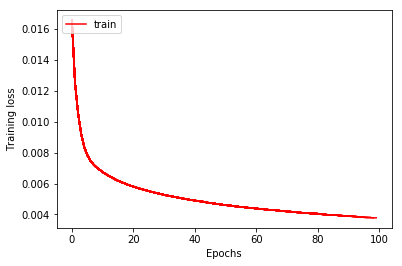

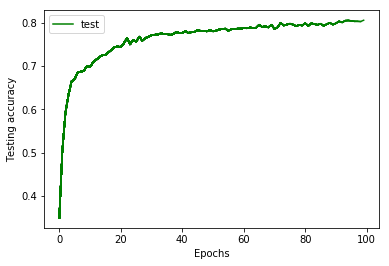

In [13]:
iterations = 100
trainLoss = []
testAcc = []
start = time.time()
for epoch in range(iterations):
    epochStart = time.time()
    runningLoss = 0    
    net.train(True) # For training
    for data in trainLoader:
        inputs,labels = data
        # Wrap them in Variable
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), \
                Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)  
       
        # Initialize gradients to zero
        optimizer.zero_grad()
        # Feed-forward input data through the network        
        outputs = net(inputs)        
        # Compute loss/error
        loss = criterion(outputs, labels)
        # Backpropagate loss and compute gradients
        loss.backward()
        # Update the network parameters
        optimizer.step()
        # Accumulate loss per batch
        runningLoss += loss.data 
    avgTrainLoss = runningLoss/8000.0
    trainLoss.append(avgTrainLoss)
    
    # Evaluating performance on test set for each epoch
    net.train(False) # For testing [Affects batch-norm and dropout layers (if any)]
    running_correct = 0
    for data in testLoader:
        inputs,labels = data
        # Wrap them in Variable
        if use_gpu:
            inputs = Variable(inputs.cuda())
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            predicted = predicted.cpu()
        else:
            inputs = Variable(inputs)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)    
        running_correct += (predicted == labels).sum()
    avgTestAcc = float(running_correct)/2000.0
    testAcc.append(avgTestAcc)
        
    # Plotting training loss vs Epochs
    fig1 = plt.figure(1)        
    plt.plot(range(epoch+1),trainLoss,'r-',label='train')        
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Training loss')   
    # Plotting testing accuracy vs Epochs
    fig2 = plt.figure(2)        
    plt.plot(range(epoch+1),testAcc,'g-',label='test')        
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Testing accuracy')    
    epochEnd = time.time()-epochStart
    print('Iteration: {:.0f} /{:.0f}  ;  Training Loss: {:.6f} ; Testing Acc: {:.3f} ; Time consumed: {:.0f}m {:.0f}s '\
          .format(epoch + 1,iterations,avgTrainLoss,avgTestAcc*100,epochEnd//60,epochEnd%60))
end = time.time()-start
print('Training completed in {:.0f}m {:.0f}s'.format(end//60,end%60))

In [14]:
if use_gpu:
  inputs = Variable(testImages.cuda())  
else:
  inputs = Variable(testImages)
outputs = net(inputs)
_, predicted = torch.max(outputs.data, 1)
finalPred = predicted.cpu().numpy()

/home/akansha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [15]:
x = np.arange(0, 2000, 1)
x.astype(int)
final = np.asarray((x,finalPred),dtype = int)
np.savetxt("TESTCV.txt",final.T,fmt='%d' ,delimiter=',', header='image_index,class',comments='')